#Домашнее задание по теме «Работа с переменными» обновленное

##Задание
Цель: изучить применение методов разведочного анализа данных (EDA) для улучшения качества работы моделей машинного обучения.

Описание задания:

В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно проведения разведочного анализа данных. В качестве датасета необходимо загрузить данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR).

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import math

**1) Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).**

In [ ]:
data = fetch_california_housing()

In [ ]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
fetch_california_housing = pd.DataFrame(data=data.data, columns=data.feature_names)

In [ ]:
fetch_california_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
fetch_california_housing['MedHouseVal'] = data.target

In [ ]:
fetch_california_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**2) Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.**

In [ ]:
fetch_california_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Пропусков нет

**3) Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.**

In [ ]:
fetch_california_housing.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [ ]:
X = fetch_california_housing[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']]

In [ ]:
y = fetch_california_housing['MedHouseVal']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

**4)Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.**

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
predict = lr.predict(X_test)

**RMSE**

In [ ]:
mean_squared_error(y_test,predict,squared=False)

0.7455813830127763

**R2**

In [ ]:
r2_score(y_test,predict)

0.575787706032451

Как видим метрики показывают не очень хороший результат работы модели

**5)Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?**

Text(0, 0.5, 'Количество')

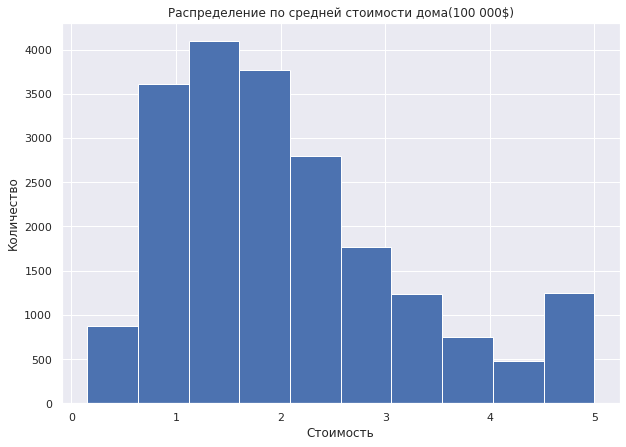

In [ ]:
fetch_california_housing['MedHouseVal'].hist()
plt.title('Распределение по средней стоимости дома(100 000$)')
plt.xlabel('Стоимость')
plt.ylabel('Количество')

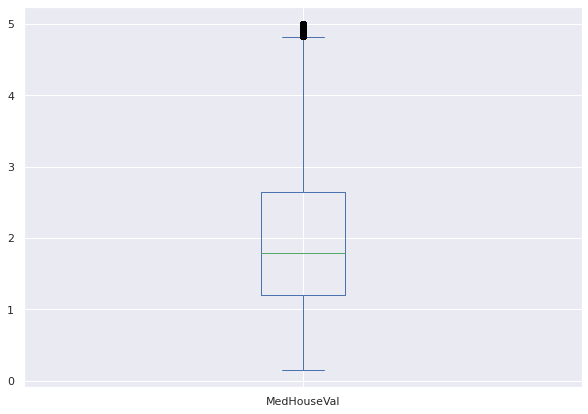

In [ ]:
fetch_california_housing['MedHouseVal'].plot(kind='box')

Видим что есть дома которые выше по стоимости, чем все остальные (около 500 000 $), но их достаточно большое количество, ошибочно было бы считать, что это выбросы, скорее всего дома относятся к элитному району.

**6)Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.**

In [ ]:
corr = fetch_california_housing.corr()
corr.style.background_gradient(cmap='coolwarm')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


**a. Сделайте выводы.**

По корреляционной матрице видно, что количество спален о количество комнат имеют между собой большую корреляцию (0.84). Нужно убрать один из этих признаков(например количество спален) и посмотреть обучиться ли лучше модель

**b. Удалите признаки на основании полученных значений, выводов.**

In [ ]:
fetch_california_housing_filt = fetch_california_housing[['MedInc', 'HouseAge', 'AveRooms','Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal']]

**c. Повторите п. 3, п. 4 на измененных данных.**

In [ ]:
X = fetch_california_housing_filt[['MedInc', 'HouseAge', 'AveRooms','Population', 'AveOccup',
       'Latitude', 'Longitude']]

In [ ]:
y = fetch_california_housing_filt['MedHouseVal']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [ ]:
lr1 = LinearRegression()

In [ ]:
lr1.fit(X_train,y_train)

LinearRegression()

In [ ]:
predict1 = lr1.predict(X_test)

**rmse**

In [ ]:
mean_squared_error(y_test,predict1,squared=False)

0.7398151789804083

**r2**

In [ ]:
r2_score(y_test,predict1)

0.5823239094526445

Благодаря тому что мы избавились от одного из признаков, которые коррелировали между собой, метрики немного улучшились(rmse стала меньше, а r2 увеличилась)

**7)Исследуйте оставленные признаки на выбросы.**

**a. Удалите выбросы в случае обнаружения.**

In [ ]:
fetch_california_housing_filt.describe()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
fetch_california_housing_filt.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude',
       'Longitude', 'MedHouseVal'],
      dtype='object')

Для поиска выбросов будем использовать боксплот

MedInc - медианный доход в группе блоков 



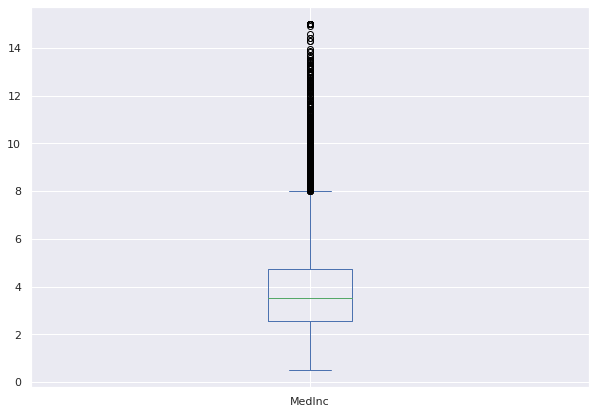

In [ ]:
fetch_california_housing_filt['MedInc'].plot(kind='box')

Хотя на боксплот видно выбросы, маловероятно что они ими являются, вполне возможно, что определенная группа людей зарабатывает больше чем остальные

HouseAge - медианный возраст дома в группе блоков

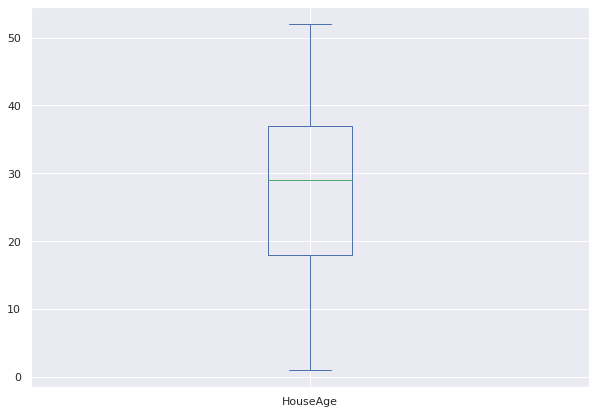

In [ ]:
fetch_california_housing_filt['HouseAge'].plot(kind='box')

В данном признаке нет выбросов

AveRooms - среднее количество комнат на домохозяйство

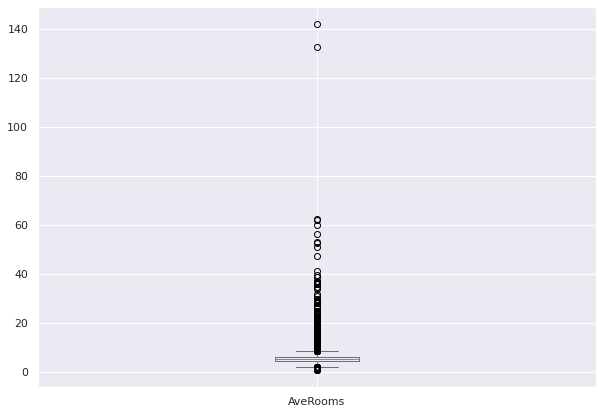

In [ ]:
fetch_california_housing_filt['AveRooms'].plot(kind='box')

В данном признаке явно присутствуют выбросы, хотя теоритически такие дома могут существовать, но в данном случае лучше их считать за выбосы, так как нет дополнительной возможности проверить на правдоподобность

In [ ]:
fetch_california_housing_filt = fetch_california_housing_filt.loc[fetch_california_housing_filt['AveRooms'] < 130]

Population - население блочной группы

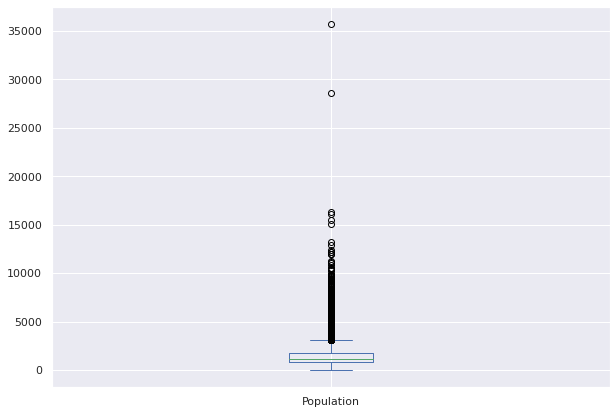

In [ ]:
fetch_california_housing_filt['Population'].plot(kind='box')

Судя по графику, в данном признаке тоже есть два явных выброса, удалим их тоже

In [ ]:
fetch_california_housing_filt = fetch_california_housing_filt.loc[fetch_california_housing_filt['Population'] < 25000]

AveOccup - среднее число членов домохозяйства

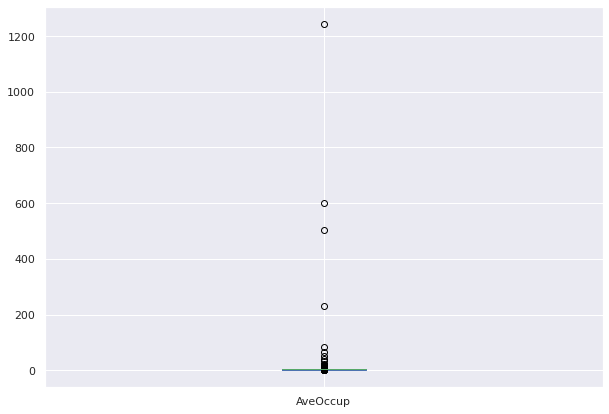

In [ ]:
fetch_california_housing_filt['AveOccup'].plot(kind='box')

По графику видно 4 явных выброса , странно что в доме может проживать более 200 человек , тем более свыше 1000, поэтому удалим эти выбросы

In [ ]:
fetch_california_housing_filt = fetch_california_housing_filt.loc[fetch_california_housing_filt['AveOccup'] < 200]

Latitude - широта группы блоков

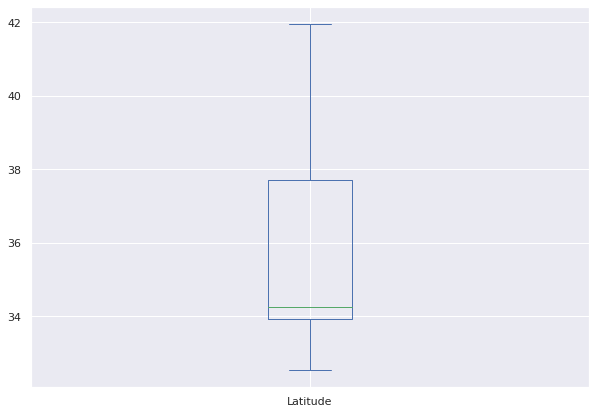

In [ ]:
fetch_california_housing_filt['Latitude'].plot(kind='box')

Нет выбросов

Longitude - долгота группы блоков 

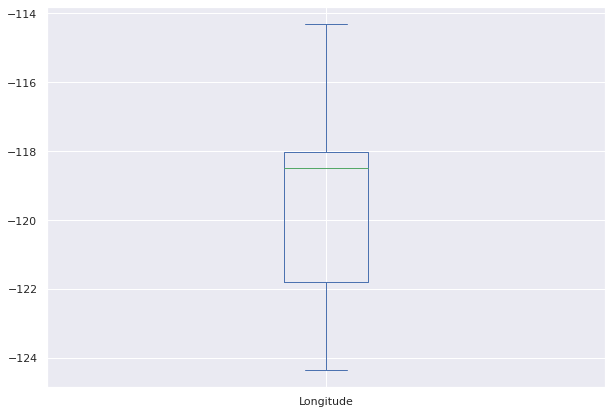

In [ ]:
fetch_california_housing_filt['Longitude'].plot(kind='box')

Нет выбросов

**b. Повторите п. 3, п. 4 на измененных данных.**

In [ ]:
fetch_california_housing_filt.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude',
       'Longitude', 'MedHouseVal'],
      dtype='object')

In [ ]:
X = fetch_california_housing_filt[['MedInc', 'HouseAge', 'AveRooms', 'Population',
                                   'AveOccup', 'Latitude','Longitude']]

In [ ]:
y = fetch_california_housing_filt['MedHouseVal']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr2 = LinearRegression()

In [ ]:
lr2.fit(X_train,y_train)

LinearRegression()

In [ ]:
predict2 = lr2.predict(X_test)

rmse

In [ ]:
mean_squared_error(y_test,predict2,squared=False)

0.7268301264234936

r2

In [ ]:
r2_score(y_test,predict2)

0.604880879781357

После очистки данных от выбросов, показатели модели стали лучше, но все равно недостаточно хорошие

**8)Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.**

In [ ]:
fetch_california_housing_filt.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
fetch_california_housing_filt['Population_log'] = np.log(fetch_california_housing_filt['Population'])

In [ ]:
fetch_california_housing_filt['AveRooms_sqrt'] = fetch_california_housing_filt['AveRooms'].apply(lambda x: math.sqrt(x))

In [ ]:
fetch_california_housing_filt.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Population_log,AveRooms_sqrt
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23,4.526,5.774552,2.642750
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22,3.585,7.783641,2.497626
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24,3.521,6.206576,2.878912
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,3.413,6.324359,2.411919
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,3.422,6.336826,2.506363


In [ ]:
fetch_california_housing_filt.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude',
       'Longitude', 'MedHouseVal', 'Population_log', 'AveRooms_sqrt'],
      dtype='object')

**a. Повторите п. 3, п. 4 на измененных данных.**

In [ ]:
X = fetch_california_housing_filt[['MedInc', 'HouseAge','AveOccup', 'Latitude',
       'Longitude','Population_log', 'AveRooms_sqrt']]

In [ ]:
y = fetch_california_housing_filt['MedHouseVal']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr3 = LinearRegression()

In [ ]:
lr3.fit(X_train,y_train)

LinearRegression()

In [ ]:
predict3 = lr3.predict(X_test)

rmse

In [ ]:
mean_squared_error(y_test,predict3,squared=False)

0.7278692431762166

r2

In [ ]:
r2_score(y_test,predict3)

0.6037503036740887

После математических преобразований наши метриметрики , хоть и немного , но ухудшились

**9)Сформулируйте выводы по проделанной работе.**

**a. Кратко опишите какие преобразования были сделаны с данными.**

Удалены признаки которые между собой коррелировали, удалены выбросы, были математически преобразованы некоторые признаки

**b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.**

In [ ]:
res = pd.DataFrame({'модель':['lr','lr1','lr2','lr3'],
                    'RMSE':[0.7455813830127763,0.7398151789804083,0.7268301264234936,0.7278692431762166],
                    'R2':[0.575787706032451,0.5823239094526445,0.604880879781357,0.6037503036740887],
                    'признаки':['MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude -  без преобразований',
                                'MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude -    удален признак с высокой корреляцией с другим признаком',
                                'MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude -    удалены выбросы',
                                'MedInc,HouseAge,AveOccup,Latitude,Longitude,Population_log,AveRooms_sqrt -   математически преобразованы AveRooms,Population']})

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
res

,модель,RMSE,R2,признаки
0,lr,0.745581,0.575788,"MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude - без преобразований"
1,lr1,0.739815,0.582324,"MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude - удален признак с высокой корреляцией с другим признаком"
2,lr2,0.726830,0.604881,"MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude - удалены выбросы"
3,lr3,0.727869,0.603750,"MedInc,HouseAge,AveOccup,Latitude,Longitude,Population_log,AveRooms_sqrt - математически преобразованы AveRooms,Population"


**c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.**

К сожалению не удалось обучить модели до достаточно хороших показателей, возможно нужно добавить еще другие признаки и больше данных